# AH2179 Applied Artificial Intelligence in Transportation Group 5 Project
### By Fabian Fermazin, William Öman, Itsuki Shindo

In [1]:
pip install calmap

In [45]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calmap

In [63]:
df = pd.read_csv('Dataset-PT_seasons.csv')
Stockholmtemp2022 = pd.read_csv('Stockholmtemp2022.csv', sep=';')

In [64]:
# Change the date format of Stockholmtemp2022 to match the df
def change_date_format(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.strftime("%Y%m%d")
Stockholmtemp2022["date"] = Stockholmtemp2022["date"].apply(change_date_format)

# Change the name of the date column to match the df
Stockholmtemp2022["Calendar_date"] = 0
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["date"]
Stockholmtemp2022.drop(columns=["date"])

,temp,Calendar_date
0,-1.4,20220101
1,1.9,20220102
2,3.6,20220103
3,0.6,20220104
4,-2.2,20220105
...,...,...
176,23.1,20220626
177,24.1,20220627
178,24.1,20220628
179,19.6,20220629


In [65]:
# Merge df and Stockholmtemp2022
Stockholmtemp2022["Calendar_date"] = Stockholmtemp2022["Calendar_date"].astype(int)
df = pd.merge(df, Stockholmtemp2022, on='Calendar_date')
df.drop(columns=['date'])
df["Calendar_date"] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

In [66]:
corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

<ipython-input-66-536349da8134>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


arrival_delay                        1.000000
upstream_stop_delay                  0.975019
origin_delay                         0.716324
previous_bus_delay                   0.265434
factor(day_of_week)weekend           0.190783
factor(time_of_day)Off-peak          0.138109
temp                                 0.108624
stop_sequence                        0.092616
dwell_time                           0.089433
travel_time_for_previous_section     0.081113
factor(weather)Normal                0.022642
factor(temperature)Normal            0.022444
factor(weather)Rain                  0.010833
factor(weather)Snow                 -0.001579
factor(weather)Light_Snow           -0.012642
bus_id                              -0.012769
factor(temperature)Cold             -0.013595
factor(temperature)Extra_cold       -0.024602
factor(weather)Light_Rain           -0.027323
previous_trip_travel_time           -0.036870
traffic_condition                   -0.043104
recurrent_delay                   

<ipython-input-67-e9cb4a2e9e5e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = x.corr()


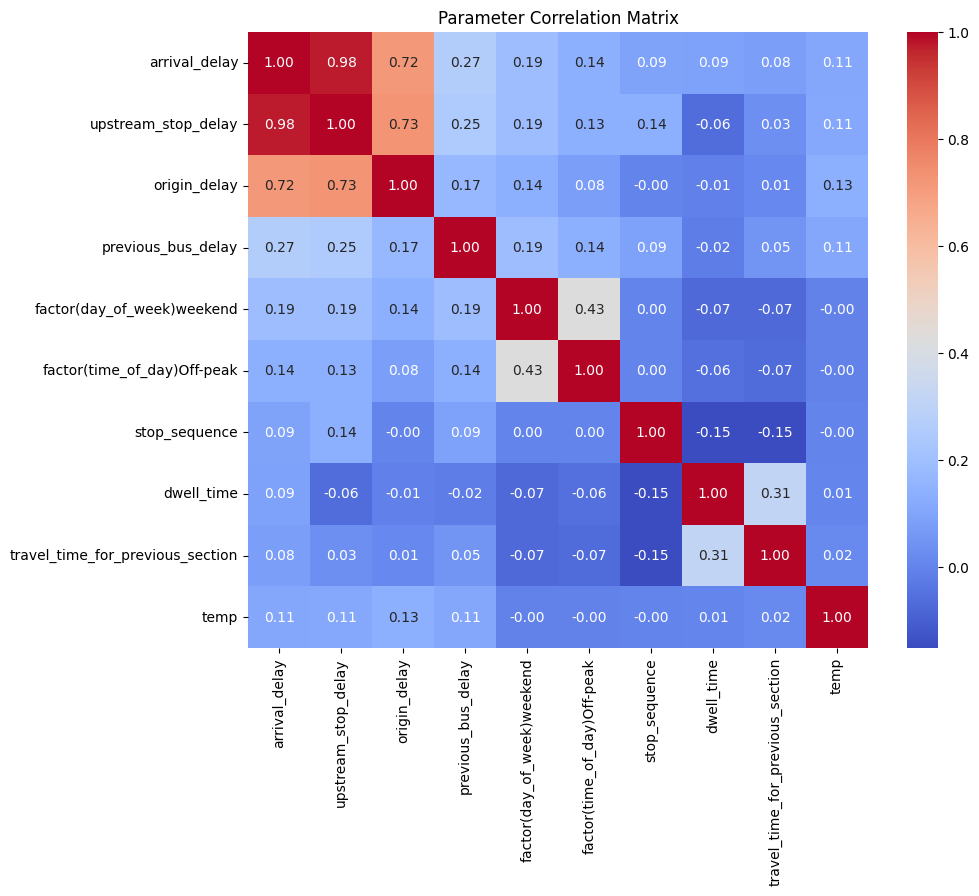

In [67]:
x = df[['arrival_delay', 'upstream_stop_delay', 'origin_delay', 'previous_bus_delay',
        'factor(day_of_week)weekend', 'factor(time_of_day)Off-peak', 'Calendar_date',
        'stop_sequence', 'dwell_time','travel_time_for_previous_section', 'temp']]

# Calculate the correlation matrix
correlation_matrix = x.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Parameter Correlation Matrix')
plt.show()

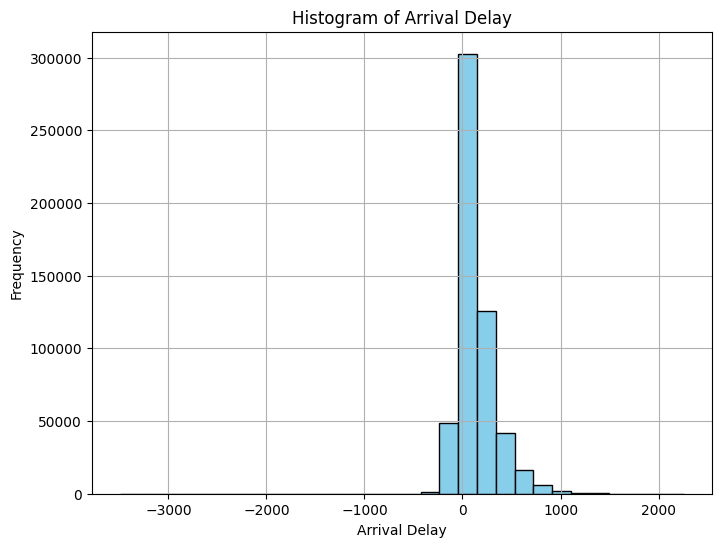

In [68]:
plt.figure(figsize=(8, 6))
plt.hist(df['arrival_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Arrival Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Note to self: 594 rows in the first day, which corresponds to 22 trips in a day, if there are 27 stops.


June 30th and May 25th have some strange busses which have -1 hour or -30 minutes delay

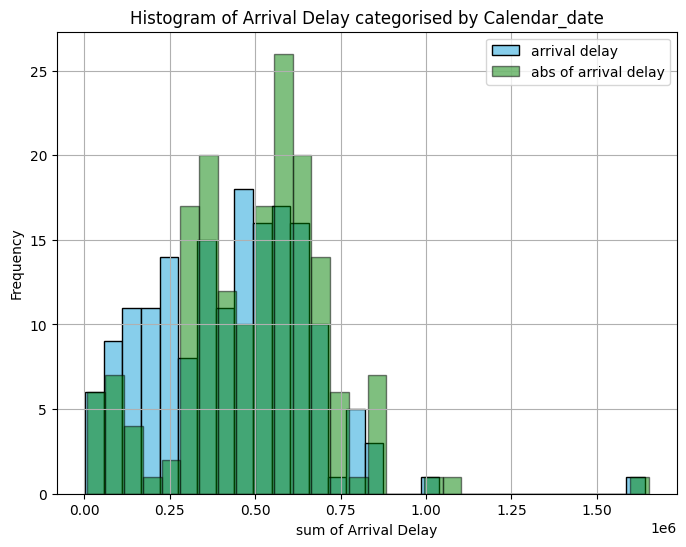

In [82]:
Calendar_date_delay = df.groupby('Calendar_date')['arrival_delay'].sum()
Calendar_date_delay_abs = df.groupby('Calendar_date')['arrival_delay_abs'].sum()


plt.figure(figsize=(8, 6))
plt.hist(Calendar_date_delay, bins=30, color='skyblue', edgecolor='black', label ='arrival delay')
plt.hist(Calendar_date_delay_abs, bins=30, color='green', edgecolor='black', alpha = 0.5, label ='abs of arrival delay')

plt.legend()
plt.title('Histogram of Arrival Delay categorised by Calendar_date')
plt.xlabel('sum of Arrival Delay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

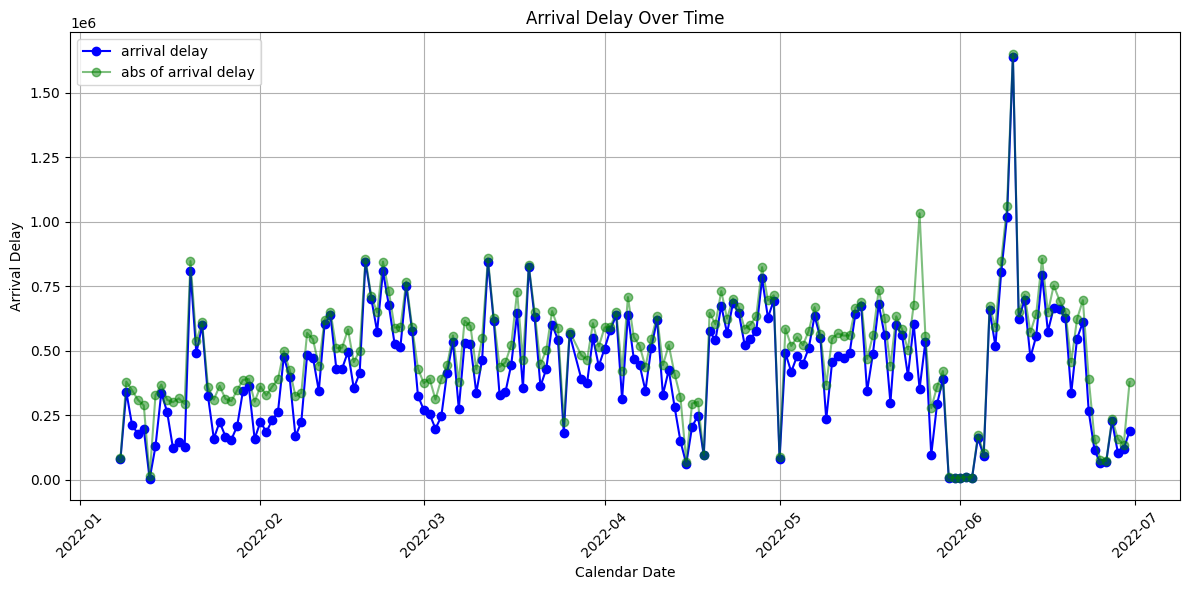

In [80]:
# Convert the index (Calendar_date) to datetime
Calendar_date_delay.index = pd.to_datetime(Calendar_date_delay.index)
Calendar_date_delay_abs.index = pd.to_datetime(Calendar_date_delay_abs.index)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(Calendar_date_delay.index, Calendar_date_delay.values, marker='o', linestyle='-', color='b', label ='arrival delay')
plt.plot(Calendar_date_delay_abs.index, Calendar_date_delay_abs.values, marker='o', linestyle='-', color='g', alpha = 0.5, label ='abs of arrival delay')

plt.legend()

plt.title('Arrival Delay Over Time')
plt.xlabel('Calendar Date')
plt.ylabel('Arrival Delay')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-a*xis labels for readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

In [85]:
df['factor(weather)Snow'].describe()

count    545103.000000
mean          0.006786
std           0.082097
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: factor(weather)Snow, dtype: float64

Next step, look at weather data if its resonable or not